## Question:

How does Nigerian artists songs that has Ginger in their lyrics compare to Foreign artists songs content about Ginger?

## Step 1: Find Lyrics Data

1. I went to genius.com and searched for songs with *'Ginger'* in the lyrics.
2. In Chrome, I went to *View* > *Developer* > *Inspect Elements*.
3. I highlighted the portion of the webpage containing the lyrics.
4. I right clicked on the section within the HTML code and selected *Copy* > *Copy element*.
5. I copied the text and save it into a .html file.

## Step 2: Extract Artists and Lyrics Using Beautiful Soup

In [4]:
from bs4 import BeautifulSoup

# songs_with_flowers.html file location
file = 'songs_with_ginger.html'

# read the html file, specifically everything within div tags
with open(file, "r") as page:

    contents = page.read()
    html = BeautifulSoup(contents, 'html.parser')

    html_body = html.find('body')
    elements = html.find_all('div')

In [5]:
elements

[<div class="modal_window-content modal_window-content--narrow_width modal_window-content--white_background" click-outside-target="" ng-class="{
       'modal_window-content--full_height': variants.full_height || !!media,
       'modal_window-content--narrow_width': variants.narrow_width,
       'modal_window-content--window_width': variants.window_width,
       'modal_window-content--no_max_width': variants.no_max_width,
       'modal_window-content--no_background': variants.no_background,
       'modal_window-content--white_background': variants.white_background,
       'modal_window-content--dark_background': variants.dark_background,
       'modal_window-content--vertically_center_contents': variants.vertically_center_contents,
       'modal_window-content--vertically_center_self': variants.vertically_center_self,
       'modal_window-content--width_of_contents': variants.width_of_contents,
       'modal_window-content--with_media': !!media,
     }" ng-style="{
       top: content_

In [6]:
# extract the text within the divs for songs
songs = [s.text for s in html.find_all("div", {"class": "mini_card-title"})]
songs

['Supermarket Flowers',
 'The Rap Monument',
 'Habits',
 'Valerie (BBC Radio 1 Live Lounge)',
 'One More Chance',
 'Little Freak',
 'Everyday Struggle',
 'XXL Freshmen 2016 Cypher - Part 1',
 'Marsh',
 'Computers',
 'Of Mice and Men: Chapter 2',
 'Senile',
 'Last Friday Night (T.G.I.F.)',
 'You Need Me, I Don’t Need You (Live at The Live Room)',
 'You Need Me, I Don’t Need You',
 'Glory',
 'She For Keeps',
 'Mask Off (Remix)',
 'That’s That',
 'J’OUVERT',
 '#Hot16Challenge2 - artyści, nominacje, drzewko / artists, nominations, chart',
 'Medusa',
 'Spice Girl',
 'Gangstas',
 'Pana',
 'Who Run It/Bring It Back/Look Alive (Megamix)',
 'Vogue',
 'Like Me',
 'Guns Blazing',
 'Syllables',
 'Jazz',
 'Bitter',
 'Gingerbread Man',
 'Potholderz',
 'HEAVEN BELONGS TO YOU',
 'Old Thing Back',
 'Warm Winds',
 'Polskie płyty w 2018 roku. Premiery, daty, zapowiedzi',
 'Martyrs',
 'Revenge',
 'The Last Huzzah (Remix)',
 'Almost Slipped',
 'Who Run It (Remix)',
 'Karneval',
 'My Honest Poem',
 'Who’s S

In [9]:
# extract the text within the divs for artists
artists = [a.text.strip() for a in html.find_all("div", {"class": "mini_card-subtitle"})]
artists[0:5]

['Ed Sheeran',
 'Noisey',
 'Eminem & White Gold',
 'Amy Winehouse',
 'The Notorious B.I.G.']

In [22]:
artists[10:]

['John Steinbeck',
 'Young Money',
 'Katy Perry',
 'Ed Sheeran',
 'Ed Sheeran',
 'Lil Wayne',
 'Quality Control, Quavo & Nicki Minaj',
 'Joyner Lucas',
 'MF\xa0DOOM',
 'BROCKHAMPTON',
 'Rap Genius Polska',
 'Carol Ann Duffy',
 'Aminé',
 'Pop Smoke',
 'Tekno',
 'Finny Music',
 'Madonna',
 'Lil Durk',
 'Eminem',
 'Eminem',
 'Mick Jenkins',
 'Nimo',
 'Melanie Martinez',
 'MF\xa0DOOM',
 'BROCKHAMPTON',
 'Matoma & The Notorious B.I.G.',
 'SZA',
 'Rap Genius Polska',
 'Mick Jenkins',
 'P!nk',
 'Mr. Muthafuckin eXquire',
 'Meek Mill',
 'G Herbo',
 'Bonez MC & RAF Camora',
 'Rudy Francisco',
 'Big Sean & Metro Boomin',
 'Rap Genius Polska',
 'Ice Spice',
 'Chuck Berry',
 'JAY-Z',
 'Harper Lee',
 'Young Dolph',
 'Lady Gaga',
 'MF\xa0DOOM',
 'Burna Boy',
 'Kinder Malo',
 'Bnxn',
 'Dave',
 'Mick Jenkins',
 'Lorentz',
 'Eve 6',
 'The Notorious B.I.G.',
 'Bushido',
 'Wizkid',
 '101Barz',
 'Asake',
 'The Notorious B.I.G.',
 'Omah Lay',
 'John Williams',
 'Ariana Grande',
 'Ralph Ellison',
 'Epic Rap

In [10]:
# extract the text within the divs for lyrics

lyrics = [l.text.strip() for l in html.find_all("div", {"class": "mini_card-lyric_excerpt"})]
lyrics = [l.text.strip().replace('\n', ' ') for l in html.find_all("div", {"class": "mini_card-lyric_excerpt"})]

lyrics[0:5]

['get-well-soon cards and stuffed animals Poured the old ginger beer down the sink Dad always told me, "Don',
 "today Noisy pack in my wrap, Hennessy in my cup Ginger ale if I chase, but I really don't",
 'like an evil stepdad I got an infrared like the ginger stepkid who pissed the bed (Ginger) I do this',
 "body's been a mess And I've missed your ginger hair And the way you like to dress Won",
 "let's dwell on the 500SL, the E&J and ginger ale The way my pockets swell to the rims"]

In [15]:
import pandas as pd

# combine the artist, song and lyrics data into one dataframe
songs_about_ginger = pd.DataFrame(zip(artists, songs, lyrics))
songs_about_ginger.columns = ['Artist', 'Song', 'Lyrics']
songs_about_ginger.head()

,Artist,Song,Lyrics
0,Ed Sheeran,Supermarket Flowers,"get-well-soon cards and stuffed animals Poured the old ginger beer down the sink Dad always told me, ""Don"
1,Noisey,The Rap Monument,"today Noisy pack in my wrap, Hennessy in my cup Ginger ale if I chase, but I really don't"
2,Eminem & White Gold,Habits,like an evil stepdad I got an infrared like the ginger stepkid who pissed the bed (Ginger) I do this
3,Amy Winehouse,Valerie (BBC Radio 1 Live Lounge),body's been a mess And I've missed your ginger hair And the way you like to dress Won
4,The Notorious B.I.G.,One More Chance,"let's dwell on the 500SL, the E&J and ginger ale The way my pockets swell to the rims"


In [39]:
# List of target artists
target_artists = ['Omah lay', 'Rema', 'Wizkid', 'Tekno', 'Burna Boy', 'Asake', 'Davido']

# Filter songs_about_ginger for these artists (case-insensitive match)
filtered_nigerian_songs = songs_about_ginger[songs_about_ginger['Artist'].str.lower().isin([a.lower() for a in target_artists])]

filtered_nigerian_songs

,Artist,Song,Lyrics
24,Tekno,Pana,"Love is a wonderful tender feeling You dey give me ginger Eh, 'say baby dancey-dancey, dance All the beauty"
54,Burna Boy,Anybody,"turn by turn Whether you like or not To ba ginger me, gbeskele go burst Ki gbe , je kan gbo"
63,Wizkid,Ginger,If you want make I ginger give me the kokoro Ma ko je bi jollof Anywhere I go Je kan
65,Asake,Lonely At The Top,heart o Ogogoro no be vodka Mr. Money ginger But una know I no dey waste time Mr. Money ginger
67,Omah Lay,soso,"one place For God's sake, my bae Come and ginger me Only you dey feel my pains Give me"
83,Davido,Coolest Kid in Africa,"eh If you fuck around, you go make my guys ginger ooh I be making and spending the owo Mehn"
102,Burna Boy,No Fit Vex,hear better news about you And smile and it dey ginger my soul I dey see your struggle I no
124,Omah Lay,understand,Thunder thunder fire that your reason We dey give you ginger make you leave me Thunder thunder fire that your
129,Rema,Corny,"come meet my mommy, oh E be you wey dey ginger my body, ooh (Ooh) Me, I don go soji"
146,Wizkid,IDK,"Eledumare na hin dey ginger me nicely Ohun oju ri, ko se so Ohun baba se, k'ose ko E"


In [40]:
# show all the text within the lyrics column instead of cutting it off
pd.set_option('display.max_colwidth', None)

In [41]:
# wiki page for most streamed artists on spotify
url = 'https://en.wikipedia.org/wiki/List_of_most-streamed_artists_on_Spotify'

In [42]:
# extract the first table from the page
top_artists = pd.read_html(url)[3]
top_artists.head()
# extract the artist names from the table
#top_artists_names = top_artists['Artist'].tolist()

,Rank,Artist,Monthly listeners (millions),Chg,Ref(s).
0,1,Bruno Mars,124.53,NaN,[21]
1,2,The Weeknd,116.28,NaN,[22]
2,3,Lady Gaga,116.24,NaN,[23]
3,4,Billie Eilish,100.29,NaN,[24]
4,5,Rihanna,92.54,NaN,[25]


In [59]:
# merge the two tables to display songs about flowers by only the top artists
foreign_top_artists = pd.merge(top_artists.Artist, songs_about_ginger, "inner", left_on = 'Artist', right_on = 'Artist')
foreign_top_artists

,Artist,Song,Lyrics
0,Lady Gaga,Marry the Night,"black Skeleton guns are wedding bells in the attic Get Ginger ready, climb to El Camino front Won't poke"
1,Ed Sheeran,Supermarket Flowers,"get-well-soon cards and stuffed animals Poured the old ginger beer down the sink Dad always told me, ""Don"
2,Ed Sheeran,"You Need Me, I Don’t Need You (Live at The Live Room)",one I've been prepared With V05 wax for my ginger hair Now I'm back to the sofa giving
3,Ed Sheeran,"You Need Me, I Don’t Need You","one, I've been prepared With V05 wax for my ginger hair So now, I'm back to the sofa"
4,Ed Sheeran,"You Need Me, I Don’t Need You (Live Ustream Version)",one I've been prepared With V05 wax for my ginger hair Now I'm back to the sofa giving
5,Ariana Grande,Wit It This Christmas,"You know I'm tasty like a candy cane Or gingerbread, I'm made with love Are you down for"
6,SZA,Warm Winds,here to take Always playing catch-me-if-you-can Gingerbread—you heard I'm sweet to taste Close your
7,Eminem,Marsh,"I get dough like Ed Sheeran, so call me the ginger bread man I'm a stan of Redman, X"
8,Eminem,Guns Blazing,"jet lag Rothstein flow, Casino And you're just like Ginger, we know Single negro, I don't need your"
9,Eminem,Syllables,"wax, spitting, bring out the white chalk All for the gingerbread, we get it and get lost Catch me if"


In [61]:
# Remove rows with index 2 and 4 from foreign_top_artists
foreign_top_artists = foreign_top_artists.drop([2, 4])
foreign_top_artists.reset_index(drop=True, inplace=True)
foreign_top_artists

,Artist,Song,Lyrics
0,Lady Gaga,Marry the Night,"black Skeleton guns are wedding bells in the attic Get Ginger ready, climb to El Camino front Won't poke"
1,Ed Sheeran,Supermarket Flowers,"get-well-soon cards and stuffed animals Poured the old ginger beer down the sink Dad always told me, ""Don"
2,Ariana Grande,Wit It This Christmas,"You know I'm tasty like a candy cane Or gingerbread, I'm made with love Are you down for"
3,Eminem,Marsh,"I get dough like Ed Sheeran, so call me the ginger bread man I'm a stan of Redman, X"
4,Eminem,Guns Blazing,"jet lag Rothstein flow, Casino And you're just like Ginger, we know Single negro, I don't need your"
5,Eminem,Syllables,"wax, spitting, bring out the white chalk All for the gingerbread, we get it and get lost Catch me if"
6,Katy Perry,Last Friday Night (T.G.I.F.),Warrant's out for my arrest Think I need a ginger ale That was such an epic fail Pictures of
7,Kanye West,Wow,"neighborhood block star Chi-Town, Go-Getter pimps, we mobsters Gingerbread Man even says, “You’re a monster” Remember that"
8,Doja Cat,Beautiful,"yet The cookie like a temple, you could call it gingerbread (-ful) Be a good example at least on the"


In [62]:
# Merge filtered_nigerian_songs and foreign_top_artists on Artist, Song, and Lyrics columns
combined_songs = pd.concat([filtered_nigerian_songs, foreign_top_artists], ignore_index=True)
combined_songs.drop_duplicates(subset=['Artist', 'Song', 'Lyrics'], inplace=True)
combined_songs.reset_index(drop=True, inplace=True)
combined_songs

,Artist,Song,Lyrics
0,Tekno,Pana,"Love is a wonderful tender feeling You dey give me ginger Eh, 'say baby dancey-dancey, dance All the beauty"
1,Burna Boy,Anybody,"turn by turn Whether you like or not To ba ginger me, gbeskele go burst Ki gbe , je kan gbo"
2,Wizkid,Ginger,If you want make I ginger give me the kokoro Ma ko je bi jollof Anywhere I go Je kan
3,Asake,Lonely At The Top,heart o Ogogoro no be vodka Mr. Money ginger But una know I no dey waste time Mr. Money ginger
4,Omah Lay,soso,"one place For God's sake, my bae Come and ginger me Only you dey feel my pains Give me"
5,Davido,Coolest Kid in Africa,"eh If you fuck around, you go make my guys ginger ooh I be making and spending the owo Mehn"
6,Burna Boy,No Fit Vex,hear better news about you And smile and it dey ginger my soul I dey see your struggle I no
7,Omah Lay,understand,Thunder thunder fire that your reason We dey give you ginger make you leave me Thunder thunder fire that your
8,Rema,Corny,"come meet my mommy, oh E be you wey dey ginger my body, ooh (Ooh) Me, I don go soji"
9,Wizkid,IDK,"Eledumare na hin dey ginger me nicely Ohun oju ri, ko se so Ohun baba se, k'ose ko E"


## Step 4: Apply Sentiment Analysis 

In [66]:
pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 162.5 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/126.0 kB 163.8 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 178.6 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/126.0 kB 261.4 kB/s eta 0:00:01
   ------------------------------ ------- 102.4/126.0 kB 346.5 kB/s eta 0:00:01
   -------------------------------------  122.9/126.0 kB 379.3 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 336.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [67]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sid_obj = SentimentIntensityAnalyzer()

In [75]:
# Calculate sentiment scores for each lyric in songs_about_ginger
sentiment_scores = combined_songs['Lyrics'].apply(lambda x: sid_obj.polarity_scores(x)['compound'])
combined_songs['Sentiment'] = sentiment_scores
combined_songs[['Artist', 'Song', 'Lyrics','Sentiment']]

,Artist,Song,Lyrics,Sentiment
0,Tekno,Pana,"Love is a wonderful tender feeling You dey give me ginger Eh, 'say baby dancey-dancey, dance All the beauty",0.9217
1,Burna Boy,Anybody,"turn by turn Whether you like or not To ba ginger me, gbeskele go burst Ki gbe , je kan gbo",0.3612
2,Wizkid,Ginger,If you want make I ginger give me the kokoro Ma ko je bi jollof Anywhere I go Je kan,0.0772
3,Asake,Lonely At The Top,heart o Ogogoro no be vodka Mr. Money ginger But una know I no dey waste time Mr. Money ginger,0.2955
4,Omah Lay,soso,"one place For God's sake, my bae Come and ginger me Only you dey feel my pains Give me",-0.4215
5,Davido,Coolest Kid in Africa,"eh If you fuck around, you go make my guys ginger ooh I be making and spending the owo Mehn",-0.5423
6,Burna Boy,No Fit Vex,hear better news about you And smile and it dey ginger my soul I dey see your struggle I no,0.2263
7,Omah Lay,understand,Thunder thunder fire that your reason We dey give you ginger make you leave me Thunder thunder fire that your,-0.6124
8,Rema,Corny,"come meet my mommy, oh E be you wey dey ginger my body, ooh (Ooh) Me, I don go soji",0.0000
9,Wizkid,IDK,"Eledumare na hin dey ginger me nicely Ohun oju ri, ko se so Ohun baba se, k'ose ko E",0.4404


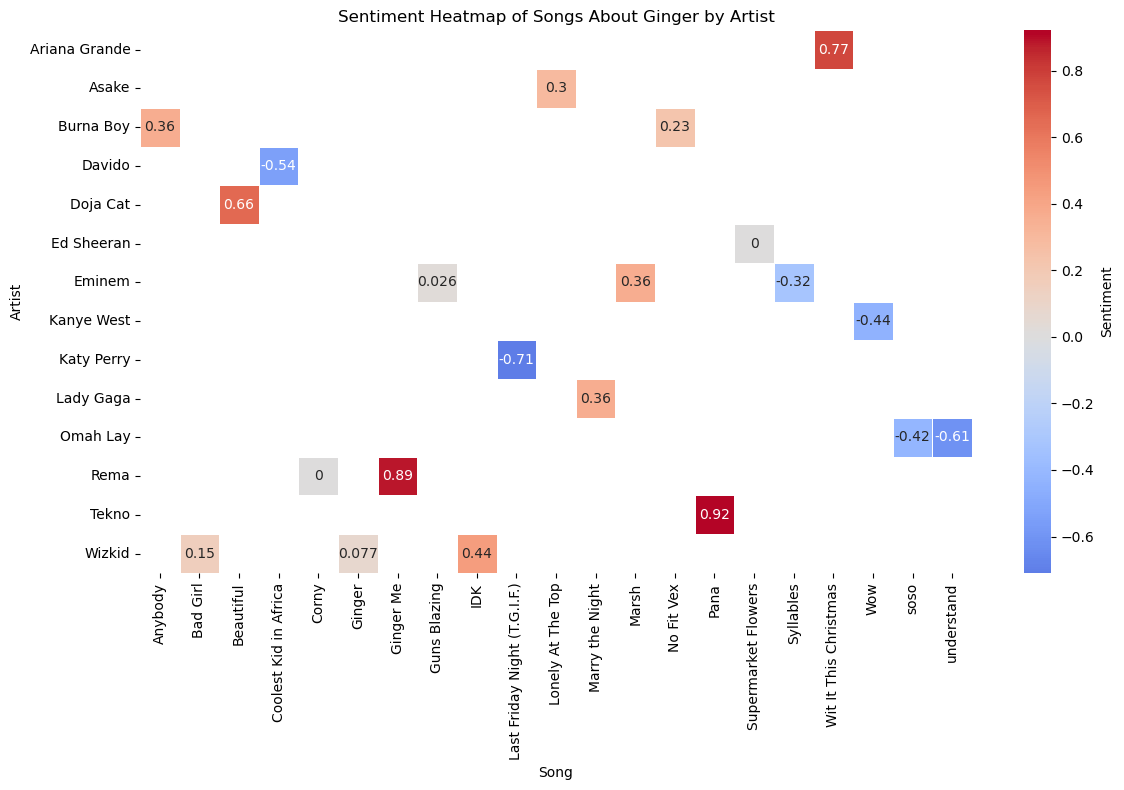

In [73]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a pivot table for the heatmap: rows=Artist, columns=Song, values=Sentiment
heatmap_data = combined_songs.pivot(index='Artist', columns='Song', values='Sentiment')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0, linewidths=0.5, cbar_kws={'label': 'Sentiment'})
plt.title('Sentiment Heatmap of Songs About Ginger by Artist')
plt.ylabel('Artist')
plt.xlabel('Song')
plt.tight_layout()
plt.show()

## Step 5: Summarize Insights

A. Sentiment Scores by Artist
* Nigerian Artists:

    * Burna Boy: 0.36 (moderately positive)

    * Rema: 0.89 (strongly positive)

    * Tekno: 0.92 (strongly positive)

    * Wizkid: 0.44 (very positive)


* Foreign Artists:

    * Ed Sheeran: 0.00 (neutral)

    * Arena Grande: 0.77 (strongly positive)

    * Doja Cat: 0.66 (strongly positive)

    * Katy Perry: -0.71 (strongly negative)

B. Notable Observations
    
   * Higher Positivity in Nigerian Artists:

        Nigerian artists (e.g., Tekno, Rema) exhibit stronger positive sentiment (0.92–0.89) compared to foreign artists like Ed Sheeran (0.00) or Arena Grande (0.77).

   * Cultural Context:

        In Nigerian slang, "ginger" often implies motivation, energy, or swagger, contributing to higher positive scores.

        Foreign artists use "ginger" more literally (e.g., referencing the spice or red hair), resulting in neutral/moderate scores.